In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

In [2]:
heart_disease = pd.read_csv('heart_disease.csv')

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


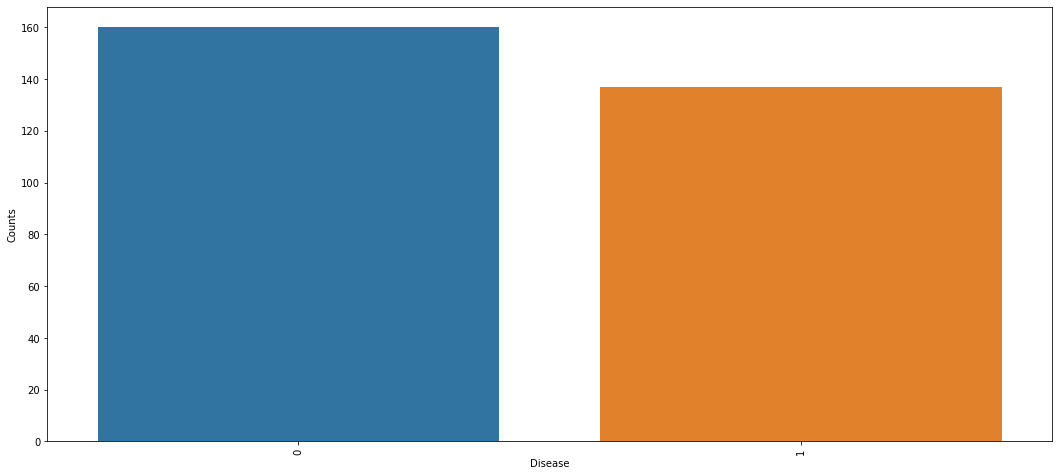

In [4]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "heart_disease.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)
 
# Checking whether the dataset is balanced or not
disease_counts = data["condition"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [5]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["condition"] = encoder.fit_transform(data["condition"])

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
 
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (237, 13), (237,)
Test: (60, 13), (60,)


In [7]:
from sklearn.svm import SVC
svc = SVC()

# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
 
# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.5        0.6        0.7        0.6        0.56666667 0.7
 0.83333333 0.82758621 0.55172414 0.5862069 ]
Mean Score: 0.646551724137931
Gaussian NB
Scores: [0.56666667 0.9        0.96666667 0.9        0.8        0.86666667
 0.96666667 0.86206897 0.75862069 0.72413793]
Mean Score: 0.8311494252873564
Random Forest
Scores: [0.53333333 0.73333333 0.83333333 0.86666667 0.8        0.96666667
 1.         0.75862069 0.65517241 0.79310345]
Mean Score: 0.7940229885057472


Accuracy on train data by SVM Classifier: 65.82278481012658
Accuracy on test data by SVM Classifier: 63.33333333333333


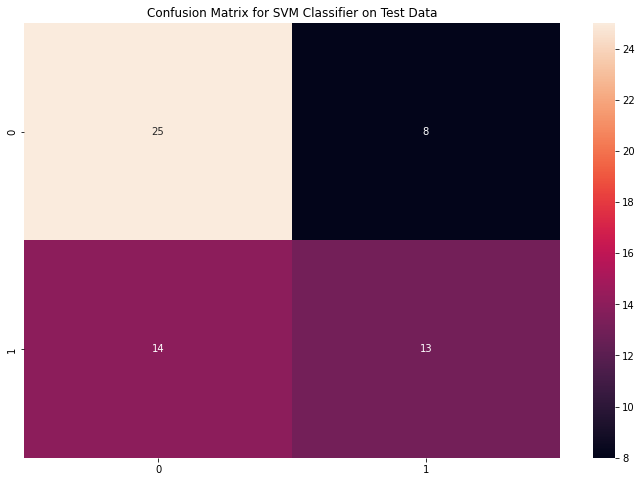

Accuracy on train data by Naive Bayes Classifier: 84.38818565400844
Accuracy on test data by Naive Bayes Classifier: 85.0


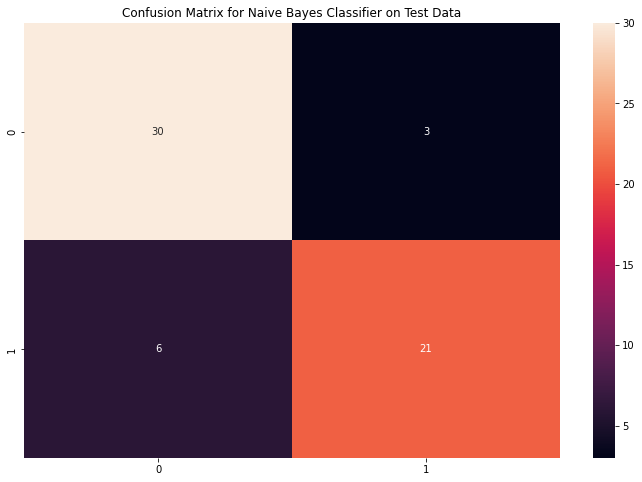

In [8]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
 
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()
 
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 86.66666666666667


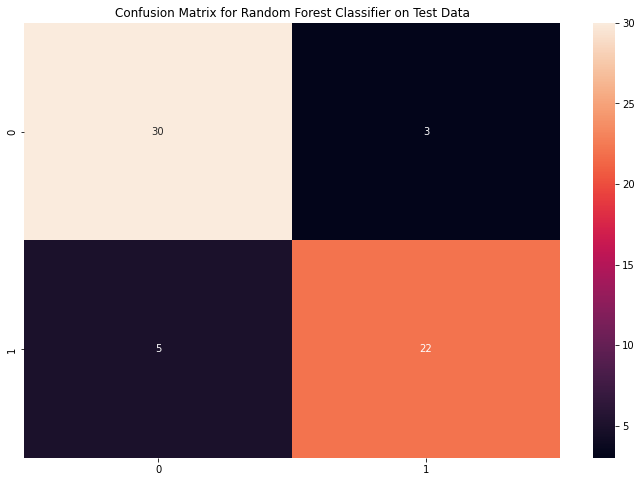

In [9]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
 
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy on Test dataset by the combined model: 90.57239057239057


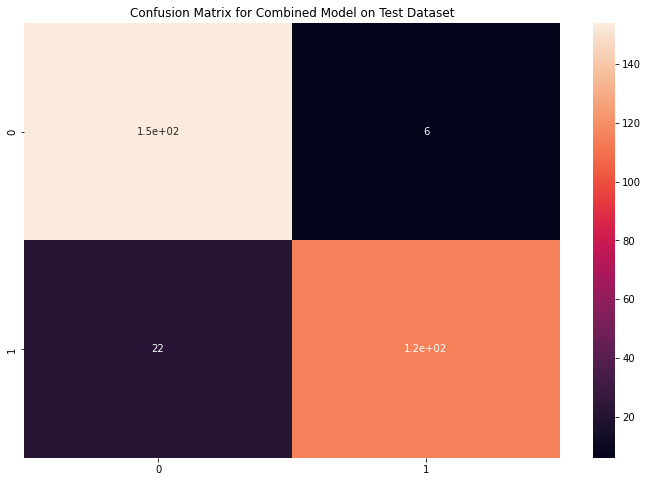

In [11]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)
 
# Reading the test data
test_data = pd.read_csv("heart_disease.csv").dropna(axis=1)
 
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])
 
# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
 
final_preds = [mode([i,j,k])[0][0] for i,j,
               k in zip(svm_preds, nb_preds, rf_preds)]
 
print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")
 
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [12]:
#saving the trained model
import pickle

In [13]:
filename = "heart_model.sav"
pickle.dump(model,open(filename,'wb'))

In [14]:
loaded_model = pickle.load(open('heart_model.sav','rb'))

In [15]:
for column in X.columns:
    print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
